In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as k

In [2]:
df=pd.read_json("master_df.json")

In [3]:
df

,Target,Text,tokens,count,count2,diff
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, removing, drill, rod, jumbo, maintenan...",33,84,51
1,I,During the activation of a sodium sulphide pum...,"[during, activation, sodium, sulphide, pump, p...",26,59,33
2,I,In the sub-station MILPO located at level +170...,"[in, level, collaborator, excavation, work, pi...",23,62,39
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[being, approximately, personnel, task, unlock...",36,110,74
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approximately, mechanics, group, leader, eric...",27,100,73
...,...,...,...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...","[being, approximately, approximately, lifting,...",18,41,23
421,I,The collaborator moved from the infrastructure...,"[the, collaborator, infrastructure, office, ju...",19,43,24
422,I,During the environmental monitoring activity i...,"[during, environmental, activity, area, employ...",18,49,31
423,I,The Employee performed the activity of strippi...,"[the, employee, activity, stripping, cathode, ...",17,36,19


In [4]:
df_main=df[["Target","tokens"]]

In [5]:
df_main["tokens"]

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [in, level, collaborator, excavation, work, pi...
3      [being, approximately, personnel, task, unlock...
4      [approximately, mechanics, group, leader, eric...
                             ...                        
420    [being, approximately, approximately, lifting,...
421    [the, collaborator, infrastructure, office, ju...
422    [during, environmental, activity, area, employ...
423    [the, employee, activity, stripping, cathode, ...
424    [at, assistant, floor, module, e, central, cam...
Name: tokens, Length: 425, dtype: object

In [6]:
df_main["Target"]

0       I
1       I
2       I
3       I
4      IV
       ..
420     I
421     I
422     I
423     I
424     I
Name: Target, Length: 425, dtype: object

In [7]:
Maximum_desc_length=45 # This is a Tunable parameters based on the Scalability of the model
Embedding_dimensions=25 # This is a Tunable Hyper-parameter based on the Scalability of the model

# Creating Word Vocabulary

This can always be and should be updated based on the scalability and the data at hand. Hoping that we continue with the model we already have.

In [8]:
from nltk.util import flatten
vocab=set(flatten(list(df_main["tokens"])))

In [9]:
vocab_dict={word:key+1 for key,word in enumerate(vocab)} #0 is used for padding

In [10]:
vocab_dict.update({0:0})

In [11]:
pd.Series(vocab_dict)

bottom         1
injured        2
degree         3
blocked        4
driver         5
            ... 
downward    1971
three       1972
lateral     1973
pinking     1974
0              0
Length: 1975, dtype: int64

In [19]:
def word2idx(text_list,vocabulary=vocab_dict):
    import numpy as np
    index=[]
    for each in text_list:
        index.append(vocabulary[each])
    return np.array(index)
        
    

In [22]:
#X=dview.map_sync(word2idx,df_main["tokens"])
df_main["word_index"] = df_main["word_index"].apply(word2idx)

KeyError: ignored

In [ ]:
X

[array([ 882, 1245, 1880, 1260,  730,  302,  768,  988,  661,  269,  640,
        1254,   15,  887, 1043, 1749,  899, 1133, 1880,  149,  771,  139,
          99,  887,  230,  139, 1069,  269, 1749, 1244,  139,  336,  730]),
 array([  55, 1897, 1617, 1638,  498, 1623,  219, 1674, 1834, 1614,  651,
         600,  672,  513, 1416,  502,  172, 1736, 1042, 1687,  534, 1478,
         762, 1638, 1674,  555]),
 array([ 514, 1818, 1305, 1457, 1558, 1907, 1252,  447, 1784, 1430,  595,
         765, 1529, 1654, 1755, 1934, 1105, 1614, 1277,  115, 1305, 1711,
          61]),
 array([1258, 1424,  699, 1350,  637, 1071,  120,   58,  102,  761, 1874,
         246,  827, 1266, 1200, 1848,   71, 1940, 1252, 1209, 1797,   33,
         777,   58,   65, 1176, 1344, 1131, 1750, 1797,   58, 1046, 1277,
        1252, 1711,   61]),
 array([1424, 1033, 1050, 1484,  653,  963,  840,  887, 1705, 1328,  498,
         474,  533,  282, 1932, 1603, 1705,  661,  784,  766, 1391, 1814,
        1192,  115, 1619, 1711, 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input
maxlen=Maximum_desc_length


In [ ]:
X=pad_sequences(X,maxlen=maxlen) # This is the perfectly padded Sequence for Analysis.

In [ ]:
X

array([[   0,    0,    0, ...,  139,  336,  730],
       [   0,    0,    0, ..., 1638, 1674,  555],
       [   0,    0,    0, ..., 1305, 1711,   61],
       ...,
       [   0,    0,    0, ...,  411, 1277, 1252],
       [   0,    0,    0, ...,  411, 1277, 1252],
       [   0,    0,    0, ...,   87,  373,   61]], dtype=int32)

In [ ]:
X.shape[1]

45

In [ ]:
levels_dict={"I":1,"II":2,"III":3,"IV":4,"V":5,"VI":6}

y=pd.get_dummies(df_main["Target"]) # This is out Target
y["VI"]=np.zeros(y.shape[0]).astype("int")
y

,I,II,III,IV,V,VI
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
420,1,0,0,0,0,0
421,1,0,0,0,0,0
422,1,0,0,0,0,0
423,1,0,0,0,0,0


In [ ]:
vocab_size2=len(vocab_dict) 
embedding_dimensions= Embedding_dimensions
length_of_sequence=X.shape[1]

embedding_layer=Embedding (vocab_size2,
                           embedding_dimensions,
                           trainable=True,
                          input_length=length_of_sequence)

input_sequences=Input(shape=(None,),dtype="int64")
k=embedding_layer(input_sequences)

In [ ]:
k

<KerasTensor: shape=(None, None, 25) dtype=float32 (created by layer 'embedding')>

# Normal LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional

lstm_out = 24

#k=SpatialDropout1D(0.4)(k)
#k=Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))(k)
k=LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)(k)
k=Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))(k)
outputs=Dense(6,activation="softmax",kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))(k)
model=Model(inputs=input_sequences,outputs=outputs)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 25)          49375     
_________________________________________________________________
lstm (LSTM)                  (None, 24)                4800      
_________________________________________________________________
dense (Dense)                (None, 12)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
Total params: 54,553
Trainable params: 54,553
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=30,batch_size=10)

Epoch 1/30
34/34 [==============================] - 2s 18ms/step - loss: 2.1847 - accuracy: 0.7324 - val_loss: 1.6388 - val_accuracy: 0.7412
Epoch 2/30
34/34 [==============================] - 0s 12ms/step - loss: 1.5464 - accuracy: 0.7441 - val_loss: 1.5288 - val_accuracy: 0.7412
Epoch 3/30
34/34 [==============================] - 0s 12ms/step - loss: 1.4369 - accuracy: 0.7441 - val_loss: 1.4480 - val_accuracy: 0.7412
Epoch 4/30
34/34 [==============================] - 0s 12ms/step - loss: 1.3022 - accuracy: 0.7441 - val_loss: 1.3551 - val_accuracy: 0.7412
Epoch 5/30
34/34 [==============================] - 0s 12ms/step - loss: 1.1077 - accuracy: 0.7441 - val_loss: 1.3413 - val_accuracy: 0.7412
Epoch 6/30
34/34 [==============================] - 0s 13ms/step - loss: 0.9673 - accuracy: 0.7441 - val_loss: 1.4738 - val_accuracy: 0.7412
Epoch 7/30
34/34 [==============================] - 0s 12ms/step - loss: 0.8756 - accuracy: 0.7706 - val_loss: 1.4409 - val_accuracy: 0.7412
Epoch 8/30
34

### Accuracy Vs Epochs for Strength of the Model

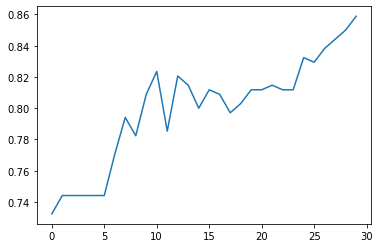

In [ ]:
plt.plot(history.epoch,history.history["accuracy"]) # Epoch Vs Accuracy. Notice it is fading to pay off after 6 epochs

### Loss Vs Accuracy for scope of application of the model

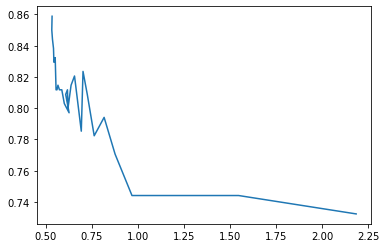

In [ ]:
plt.plot(history.history["loss"],history.history["accuracy"]) # Loss Vs Accuracy plot (Not much in this)

# Bidirectional LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
# start 25 and up to 45 with step 2
# LSTM add change to 25 to 45 and experiment 
# 
lstm_out = 48
model2=Sequential()
model2.add(Embedding(vocab_size2,embedding_dimensions,trainable=True,input_length=length_of_sequence))
model2.add(SpatialDropout1D(0.4))
model2.add(Bidirectional(LSTM(lstm_out, dropout=0.2, return_sequences=True, recurrent_dropout=0.2)))
model2.add(LSTM(48, dropout=0.2,unroll=True,recurrent_dropout=0.2))
model2.add(Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model2.add(Dense(6,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model2.summary())
history2=model2.fit(X,y,validation_split=0.2,batch_size=15,epochs=30)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 25)            49375     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 45, 25)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 45, 96)            28416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 48)                27840     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                588       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
Total params: 106,297
Trainable params: 106,297
Non-trainable params: 0
__________________________________________________

In [ ]:
#dir(history)

In [ ]:

# Variable-length int sequences.
input_sequences=Input(shape=(None,),dtype="int64")

query_input = tf.keras.Input(shape=(None,), dtype='int32')
value_input = tf.keras.Input(shape=(None,), dtype='int32')

# Embedding lookup.
token_embedding = embedding_layer(input_sequences)
# Query embeddings of shape [batch_size, Tq, dimension].
query_embeddings = token_embedding(query_input)
# Value embeddings of shape [batch_size, Tv, dimension].
value_embeddings = token_embedding(value_input)

# CNN layer. (experiment with filters)
cnn_layer = tf.keras.layers.Conv1D(
    filters=100,
    kernel_size=4,
    # Use 'same' padding so outputs have the same shape as inputs.
    padding='same')
# Query encoding of shape [batch_size, Tq, filters].
query_seq_encoding = cnn_layer(query_embeddings)
# Value encoding of shape [batch_size, Tv, filters].
value_seq_encoding = cnn_layer(value_embeddings)

# Query-value attention of shape [batch_size, Tq, filters].
query_value_attention_seq = tf.keras.layers.Attention()(
    [query_seq_encoding, value_seq_encoding])

# Reduce over the sequence axis to produce encodings of shape
# [batch_size, filters].
query_encoding = tf.keras.layers.GlobalAveragePooling1D()(
    query_seq_encoding)
query_value_attention = tf.keras.layers.GlobalAveragePooling1D()(
    query_value_attention_seq)

# Concatenate query and document encodings to produce a DNN input layer.
input_layer = tf.keras.layers.Concatenate()(
    [query_encoding, query_value_attention])

# Add DNN layers, and create Model.
lstm_out = 48
model2=Sequential()
model2.add(input_layer)
model2.add(SpatialDropout1D(0.4))
model2.add(Bidirectional(LSTM(lstm_out, dropout=0.2, return_sequences=True, recurrent_dropout=0.2)))
model2.add(LSTM(48, dropout=0.2,unroll=True,recurrent_dropout=0.2))
model2.add(Dense(12,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model2.add(Dense(6,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model2.summary())
history2=model2.fit(X,y,validation_split=0.2,batch_size=15,epochs=30)

### Accuracy Vs Epochs for Strength of the Model

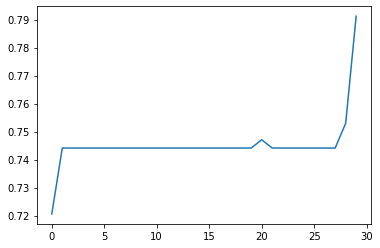

In [ ]:
plt.plot(history2.epoch,history2.history["accuracy"]) # Epoch Vs Accuracy. Notice it is fading to pay off after 6 epochs

### Loss Vs Accuracy for scope of application of the model

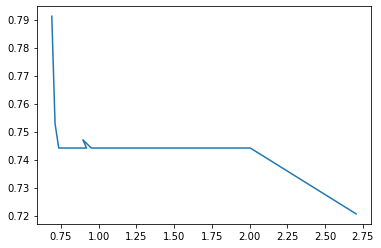

In [ ]:
plt.plot(history2.history["loss"],history2.history["accuracy"]) # Loss Vs Accuracy plot (Not much in this)

**Observations**

1. Model is refusing to learn beyond a certain point. So, it means that saturation point for the model has reached. So, there needs some experimentation w.r.t hyper-parameters or the model itself has to change.
2. It is noticed that rate of initial learning is extremely fast, most probably indicating that Model will most likely be an overfit for the kind of data at hand at present and future scope of data. This implies model needs to be a lot more simplified in the sense that paramters, LSTM layers (as guessed before) will have to be reduced and attempted again.
3. As we have seen before certain words are holding special interest, so Attention mechanism can be deployed here for testing and evaluating purposes.

# Preliminary Analysis of Models

1. It has been noted that preliminary training on the network model is not yeilding accuracy beyond 74 %. There needs to be a lot more deeper exploration into the model parameters and increase/decrease layers or something with iterations until we find the sweet spot.
2. The first signs show that the model can definitely be improved with a few tweaks here and there. Tuning is required not change in model.
3. However, other models like BERT or other Attention mechanism models can be explored for feasibility and scalability if it is required.

# More Comments and Notes Below cell
